In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [581]:
asg = pd.read_csv("data/ASG_Dates.csv")
att = pd.read_csv("data/Attendance_and_Capacity_Data.csv")
dma = pd.read_csv("data/DMA_Households.csv")
end = pd.read_csv("data/End_of_Season_WPct.csv")

gam = pd.read_csv("data/Game_Data.csv")
jer = pd.read_csv("data/Jersey_Sales_Rankings_Data.csv")
nat = pd.read_csv("data/National_Ratings.csv")
# lea = pd.read_csv("data/League_EV_Data.xlsx")
# This one has warning in col 4 that says mixed data types
pct = pd.read_csv("data/Pct_Indy_Tix_Sold.csv")

pla = pd.read_csv("data/Player_Data.csv")
rsn = pd.read_csv("data/RSN_Ratings.csv")
tea = pd.read_csv("data/Team_Abbreviations.csv")
web = pd.read_csv("data/Web_Metrics.csv")
wpc = pd.read_csv("data/WPct_by_Day.csv")

In [582]:
## CLEAN DATA FOR pct

# Observe types in the column
pct_mixed_types = set(type(elt) for elt in pct['Pct_Indy_Tix_Sold'])
print(pct_mixed_types)

good_inds = np.where(pct['Pct_Indy_Tix_Sold'] != '#DIV/0!')[0]

# Take out bad rows
pct = pct.loc[good_inds]

# Convert to floats
pct['Pct_Indy_Tix_Sold'] = pct['Pct_Indy_Tix_Sold'].apply(lambda x: eval(str(x)))

# Confirm that all elements are strings now
data_types = set(type(elt) for elt in pct['Pct_Indy_Tix_Sold'])
print(data_types)

set([<type 'float'>, <type 'str'>])
set([<type 'numpy.float64'>])


In [583]:
def check_null_all_cols(df):
    return sum(np.where(df.isnull())[0])

In [584]:
check_dfs = [gam, jer, nat, pct]

# Check that there are no null values
for df in check_dfs:
    if check_null_all_cols(df):
        print("Null columns here")
    else:
        continue

In [585]:
# Returns updated fig, ax with histograms for all columns in df
def make_hists(df):
    # Creates (ind, value) pairs
    cols = df.columns.values
    
    col_ind_pairs = enumerate(cols)
    
    plt_length = 0
    numeric_cols = []
    for ind, col in col_ind_pairs:
        is_numeric = df[col].dtype != 'object'
        if is_numeric:
            plt_length += 1
            numeric_cols.append(col)
    
    fig, ax = plt.subplots(plt_length, 1)
    
    for ind, col in enumerate(numeric_cols):
        if plt_length != 1:
            ax[ind].hist(df[col])
            ax[ind].set_title(col)
        else:
            ax.hist(df[col])
            ax.set_title(col)
    
    return fig, ax

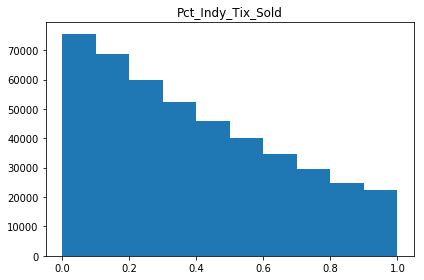

In [586]:
fig, ax = make_hists(pct)
plt.tight_layout()

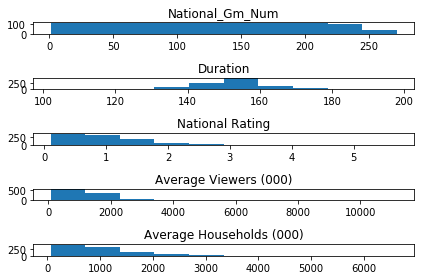

In [587]:
fig, ax = make_hists(nat)
plt.tight_layout()

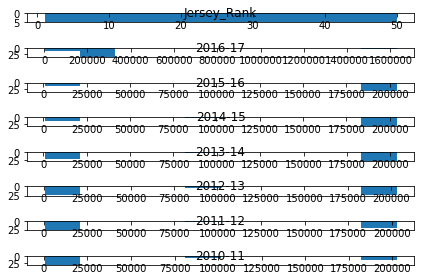

In [588]:
fig, ax = make_hists(jer)
plt.tight_layout()

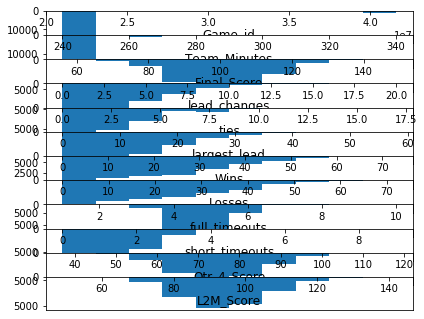

In [589]:
fig, ax = make_hists(gam)
plt.tight_layout()

In [590]:
# Create keys on which to match
nat_key = nat['Network'] + nat['Away Team'] + nat['Date']
rsn_key = rsn['NAT TV'] + rsn['AWAY'] + rsn['DATE']

# Assign keys to new columns in data frame
nat['key'] = nat_key
rsn['key'] = rsn_key

# Add dummy values into column whose values will be 
rsn['Nat Rate'] = pd.Series(['chickens' for i in range(len(rsn))])

In [591]:
# Both data1 and data2 have col to match on w/ name key_col
# Look at key val in data1, find the appropriate row in 
# data2 and take the value in the col of interest in data2
# from that row, input the value into the appropriate row
# in data1
def col_merge(data1, data2, key_col, add_col, new_col):
    d_len = len(data1)
    for i in range(0, d_len):
        row = data1.iloc[i, :]
        d1_key = row[key_col]

        # Index in National Ratings
        ind = np.where(data2[key_col] == d1_key)[0]
        if ind.size != 0:
            val = data2[add_col][ind[0]]
            data1[new_col].set_value(i, val)
        
    return data1

In [592]:
col_merge(rsn, nat, 'key', 'National Rating', 'Nat Rate')

,GM,DAY,DATE,ET,LOCAL,AWAY,HOME,AWAY TV,DUR,HH RTG,...,HOME TV,DUR.1,HH RTG.1,HH SHR.1,HH IMP.1,P2+ IMP.1,NAT TV,CN TV,key,Nat Rate
0,1,Tue,2016-10-25,8:00:00 PM,8:00:00 PM,NYK,CLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TNT,NaN,TNTNYK2016-10-25,2.2
1,2,Tue,2016-10-25,10:00:00 PM,7:00:00 PM,UTA,POR,ROOT-RM,150.0,3.13,...,KGW,150.0,8.6,14,99,142,NaN,NaN,NaN,chickens
2,3,Tue,2016-10-25,10:30:00 PM,7:30:00 PM,SAS,GSW,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TNT,NaN,TNTSAS2016-10-25,2.6
3,4,Wed,2016-10-26,7:00:00 PM,7:00:00 PM,MIA,ORL,FS-SUN,165.0,4.8,...,FSFL,165.0,1.4,2,21,32,NaN,NaN,NaN,chickens
4,5,Wed,2016-10-26,7:00:00 PM,7:00:00 PM,DAL,IND,FSSW-DAL,180.0,1.4,...,FSI,180.0,4.4,7,48,NaN,NaN,NaN,NaN,chickens
5,6,Wed,2016-10-26,7:30:00 PM,7:30:00 PM,BRK,BOS,YES,150.0,0.6,...,CSN-NE,150.0,2.8,5,68,91,NaN,NaN,NaN,chickens
6,7,Wed,2016-10-26,7:30:00 PM,7:30:00 PM,DET,TOR,FSD,150.0,1.47,...,TSN,NaN,NaN,NaN,NaN,NaN,NaN,TSN,NaN,chickens
7,8,Wed,2016-10-26,8:00:00 PM,7:00:00 PM,CHA,MIL,FSSE-CHA,165.0,0.836363636,...,FSNWI,165.0,3.1,5,28,NaN,NaN,NaN,NaN,chickens
8,9,Wed,2016-10-26,8:00:00 PM,7:00:00 PM,MIN,MEM,FSNN-MIN,165.0,3.1,...,FSSE-MEM,165.0,3.8,6,24,NaN,NaN,NaN,NaN,chickens
9,10,Wed,2016-10-26,8:00:00 PM,7:00:00 PM,DEN,NOP,ASE,165.0,0.4,...,FSNO,150.0,1.58,2.2,10.2,NaN,NaN,NaN,NaN,chickens


In [593]:
# Delete previous key column
del rsn['key']

In [594]:
ratings = pd.DataFrame([rsn['HH RTG'], rsn['Nat Rate']]).T

In [595]:
ratings['Nat Rate'].iloc[np.where(ratings['Nat Rate'] == 'chickens')[0]] = np.NaN

In [596]:
# np.mean(row[0], row[1])
for i in range(len(ratings)):
    row = ratings.iloc[i]
    if pd.isnull(row[0]):
        row.set_value(0, row[1])
    elif pd.isnull(row[1]):
        row.set_value(1, row[0])
    else:
        row.set_value(0, 69)
    ratings.iloc[i] = row

In [597]:
ratings

,HH RTG,Nat Rate
0,NaN,2.2
1,3.13,NaN
2,NaN,2.6
3,4.8,NaN
4,1.4,NaN
5,0.6,NaN
6,1.47,NaN
7,0.836363636,NaN
8,3.1,NaN
9,0.4,NaN


In [598]:
####### PLAYER DATA ########

In [599]:
# pla2010 = pla.iloc[np.where(pla['Season_id'] == 2010)[0]]
# pla2011 = pla.iloc[np.where(pla['Season_id'] == 2011)[0]]
# pla2012 = pla.iloc[np.where(pla['Season_id'] == 2012)[0]]
pla2013 = pla.iloc[np.where(pla['Season_id'] == 2013)[0]]
pla2014 = pla.iloc[np.where(pla['Season_id'] == 2014)[0]]
pla2015 = pla.iloc[np.where(pla['Season_id'] == 2015)[0]]
pla2016 = pla.iloc[np.where(pla['Season_id'] == 2016)[0]]

In [600]:
# Exp. get_num_allstars(pla2016)
def get_num_allstars(df):
    team_names = tea['Abbr']

    num_allstars = dict(zip(team_names, [0 for i in range(0, len(team_names))]))
    for team in team_names:
        team_subset = df.iloc[np.where(df['Team'] == team)[0], :]

        num_team_allstars = 0
        players = np.unique(team_subset['Person_id'])
        for player in players:
            player_subset = team_subset.iloc[np.where(team_subset['Person_id'] == player)[0], :]
            is_allstar = player_subset['ASG_Team'] != "None"
            is_allstar = is_allstar.apply(lambda x: int(x))
            if sum(is_allstar):
                num_team_allstars += 1

        num_allstars[team] = num_team_allstars
    return num_allstars

In [601]:
# Compress gam data to have one unique row for each game
# Scores are formatted in terms of away - home
uniq_games = np.unique(gam['Game_id'])

combined_data = []
for ident in uniq_games:
    data_subset = gam.iloc[np.where(gam['Game_id'] == ident)[0], :]
    home_row = data_subset.iloc[np.where(data_subset['Location'] == 'H')[0]].iloc[0]
    away_row = data_subset.iloc[np.where(data_subset['Location'] == 'A')[0]].iloc[0]
    
    new_row_data = [
        home_row['Game_id'], 
        away_row['Team'], 
        home_row['Team'], 
        np.mean([home_row['Team_Minutes'], away_row['Team_Minutes']]), 
        "{} - {}".format(away_row['Final_Score'], home_row['Final_Score']), 
        max(home_row['lead_changes'], away_row['lead_changes']), 
        max(home_row['ties'], away_row['ties']), 
        max(home_row['largest_lead'], away_row['largest_lead']), 
        sum([home_row['full_timeouts'], away_row['full_timeouts']]), 
        sum([home_row['short_timeouts'], away_row['short_timeouts']]), 
        home_row['date_est'], 
        "{} - {}".format(away_row['Qtr_4_Score'], home_row['Qtr_4_Score']), 
        "{} - {}".format(away_row['L2M_Score'], away_row['L2M_Score'])
    ]
    
    combined_data.append(new_row_data)

In [602]:
new_row_titles = [
    'Game_id', 'Away Team', 'Home Team', 'Team_Minutes', 'Final_Score', 
    'lead_changes', 'ties', 'largest_lead', 'full_timeouts', 'short_timeouts', 
    'date_est', 'Qtr_4_Score', 'L2M_Score'
]

new_gam = pd.DataFrame(combined_data, columns = new_row_titles)

In [603]:
# Subset game data by year
# gam2017 = new_gam[new_gam['date_est'].str.contains('2017')]
gam2016 = new_gam[new_gam['date_est'].str.contains('2016')]
gam2015 = new_gam[new_gam['date_est'].str.contains('2015')]
gam2014 = new_gam[new_gam['date_est'].str.contains('2014')]
gam2013 = new_gam[new_gam['date_est'].str.contains('2013')]

# Take out [2010,2012]
new_gam = pd.concat([gam2013, gam2014, gam2015, gam2016])

In [604]:
allstars2013 = get_num_allstars(pla2013)
allstars2014 = get_num_allstars(pla2014)
allstars2015 = get_num_allstars(pla2015)
allstars2016 = get_num_allstars(pla2016)

In [612]:
# Creates predictor col for number of allstars playing in the game
new_gam['num_allstars'] = ['chickens' for i in range(0,len(new_gam))]

new_gam_len = len(new_gam)

for i in range(0, new_gam_len):
    row = new_gam.iloc[i, :]
    away = row['Away Team']
    home = row['Home Team']
    date = row['date_est']
    
    if '2013' in date:
        row.set_value('num_allstars', 
                      value = allstars2013[away] + allstars2013[home]
        )
    elif '2014' in date:
        row.set_value('num_allstars', 
                      value = allstars2014[away] + allstars2014[home]
        )
    elif '2015' in date:
        row.set_value('num_allstars', 
                      value = allstars2015[away] + allstars2015[home]
        )
    else:
        row.set_value('num_allstars', 
                      value = allstars2016[away] + allstars2016[home]
        )
    new_gam.iloc[i, :] = row

In [616]:
new_gam.head()

,Game_id,Away Team,Home Team,Team_Minutes,Final_Score,lead_changes,ties,largest_lead,full_timeouts,short_timeouts,date_est,Qtr_4_Score,L2M_Score,num_allstars
2632,21200413,CHI,IND,240.0,101 - 111,2,5,14,9,4,2/4/2013,76 - 87,92 - 92,3
2677,21200458,DAL,WAS,240.0,103 - 94,1,1,15,9,2,1/1/2013,83 - 71,99 - 99,2
2678,21200459,POR,NYK,240.0,105 - 100,0,1,19,11,4,1/1/2013,78 - 71,98 - 98,3
2679,21200460,SAC,DET,240.0,97 - 103,5,1,16,10,3,1/1/2013,67 - 80,95 - 95,0
2680,21200461,ATL,NOP,240.0,95 - 86,3,3,11,9,0,1/1/2013,72 - 64,91 - 91,2


In [639]:
asg['ASG_Date'] = asg['ASG_Date'].apply(lambda x: x.split('/'))
asg['ASG_Date'] = asg['ASG_Date'].apply(
    lambda x: '20' + x[2] + '-' + x[0] + '-' + x[1]
)

In [641]:
asg

,Season,ASG_Date
0,2010,2011-2-20
1,2011,2012-2-26
2,2012,2013-2-17
3,2013,2014-2-16
4,2014,2015-2-15
5,2015,2016-2-14
6,2016,2017-2-19


In [644]:
wpc.iloc[np.where(wpc['Entering'] == asg['ASG_Date'][3])[0]]

,Entering,Season,ATL,BOS,BRK,CHA,CHI,CLE,DAL,DEN,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
1295,2014-2-16,2013-14,0.490196078,0.351851852,0.470588235,0.433962264,0.519230769,0.377358491,0.592592593,0.470588235,...,0.781818182,0.296296296,0.277777778,0.588235294,0.679245283,0.339622642,0.716981132,0.538461538,0.365384615,0.480769231
